https://www.kaggle.com/datasets/andrewmvd/hard-hat-detection/data

In [1]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import pickle
from sklearn.metrics import classification_report
from PIL import Image
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline

In [2]:
from os import listdir
from os.path import isfile, join

In [3]:
classes = ["helmet", "head", "person"]

In [4]:
path_annotations = "./archive/annotations/"
path_images = "./archive/images/"

In [5]:
list_files = [f for f in listdir(path_images) if isfile(join(path_images, f))]

In [6]:
print(list_files[0])

hard_hat_workers0.png


In [7]:
import xml.etree.ElementTree as ET
xml_file = path_annotations + list_files[0][:-3] + "xml"
tree = ET.parse(xml_file)
root = tree.getroot()

In [8]:
list_annotations = []
for file in list_files:
    xml_file = path_annotations + file[:-3] + "xml"
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for object in root.findall('object'):
        label = object.find('name').text
        for index, item in enumerate(classes):
            if label == item:
                label = index
                
        bndbox = object.find('bndbox')
        
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        
        dict_object = dict()
        dict_object["label"] = label
        dict_object["img"] = file
        dict_object["xmin"] = xmin
        dict_object["ymin"] = ymin
        dict_object["xmax"] = xmax
        dict_object["ymax"] = ymax
        
        list_annotations.append(dict_object)


print(list_annotations[0])
       

{'label': 0, 'img': 'hard_hat_workers0.png', 'xmin': 357, 'ymin': 116, 'xmax': 404, 'ymax': 175}


357 116 404 175


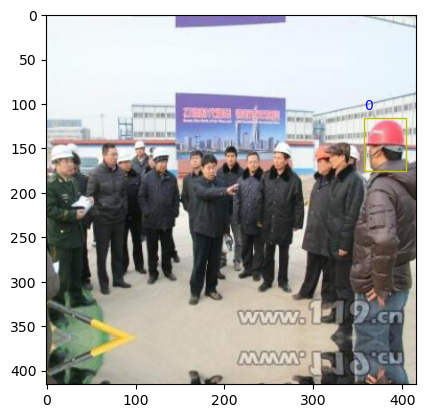

In [88]:
from matplotlib.patches import Rectangle
with Image.open(path_images + list_files[0]) as im:
    fig, ax = plt.subplots()
    ax.imshow(im)
    
    label = list_annotations[0]["label"]

    xmin = list_annotations[0]["xmin"]
    ymin = list_annotations[0]["ymin"]
    xmax = list_annotations[0]["xmax"]
    ymax = list_annotations[0]["ymax"]
    print(xmin, ymin, xmax, ymax)

    rect = Rectangle(
        (xmin, ymin),
        xmax - xmin, ymax - ymin, linewidth=1, edgecolor='y', facecolor='none'
    )
    ax.add_patch(rect)
    plt.text(xmin, ymin - 10, label, color='b')
    plt.show()

In [89]:
list_classes = [[j for j in list_annotations if j["label"] == i] for i in range(len(classes))]

In [90]:
len_list_classes = [len(item) for item in list_classes]

In [91]:
print(sum(len_list_classes))

25502


In [92]:
train = []
test = []
for i in range(len(list_classes)):
    train.extend(list_classes[i][:int(len_list_classes[i]*0.8)])
    test.extend(list_classes[i][int(len_list_classes[i]*0.8)+1:])


In [138]:
print(len(train))



20400


In [139]:
print(train[0])

{'label': 0, 'img': 'hard_hat_workers0.png', 'xmin': 357, 'ymin': 116, 'xmax': 404, 'ymax': 175}


In [182]:
def create_arrays_xy(data):
    data_X = []
    data_y = []

    for item in data:
        with Image.open(path_images+item["img"]) as im:
            img = np.asarray(im)
        
        img = img[item["ymin"]:item["ymax"]+1, item["xmin"]:item["xmax"]+1]
     
        if img.shape[0] < 256:
            pad = int(256-img.shape[0])
            img = np.pad(img, ((0, pad), (0,0), (0, 0)), 'constant')
        if img.shape[1] < 256:
            pad = int((256 - img.shape[1])) 
            img = np.pad(img, ((0,0), (0, pad), (0, 0)), 'constant')
            
        print(img.shape)

        img = img.reshape(3, 256, 256)
        img = np.transpose(img, [1, 2, 0]) # NCHW -> NHWC

            
        data_X.append(img)
        data_y.append(item['label'])                       
      
    
    return data_X, data_y

In [183]:
train_X, train_y = create_arrays_xy(train)
print("test:")
test_X, test_y = create_arrays_xy(test)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 

ValueError: cannot reshape array of size 204288 into shape (3,256,256)

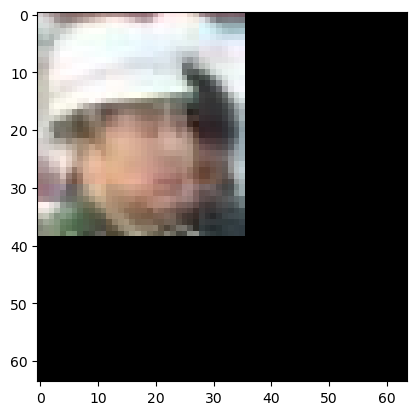

In [159]:
plt.imshow(train_X[1])

In [167]:

train_y_np = np.array(train_y)

for item in train_X:
    

train_X_np = np.asarray(train_X, dtype=np.ndarray)
print(train_X_np[1])
train_X_np = train_X_np.reshape(-1, 3, 64, 64)
train_X_np = np.transpose(train_X_np, [0, 2, 3, 1]) # NCHW -> NHWC

test_y_np = np.array(test_y)
test_X_np = np.array(test_X, dtype=np.ndarray)
test_X_np = test_X.reshape(-1, 3, 64, 64)
test_X_np = np.transpose(test_X_np, [0, 2, 3, 1]) # NCHW -> NHWC

[[[212 206 208]
  [193 183 184]
  [170 156 156]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[220 222 221]
  [212 210 211]
  [202 194 194]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[212 221 218]
  [215 219 218]
  [205 207 204]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


ValueError: cannot reshape array of size 20400 into shape (3,64,64)